In [ ]:
#https://www.bilibili.com/video/BV11t411j7Me?p=1

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import plotting
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn import metrics

In [21]:
def load_data(input_file):
    X = []
    with open(input_file,'r') as f:
        for line in f.readlines():
            data = [float(x) for x in line.split(',')]
            X.append(data)
    return np.array(X)

In [26]:
data = load_data('data_multivar.txt')

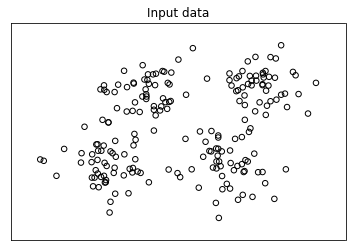

In [27]:
num_clusters = 4
plt.figure()
plt.scatter(data[:,0], data[:,1],marker='o',facecolors='none', edgecolors='k', s=30)
x_min, x_max = min(data[:, 0]) - 1, max(data[:,0]) + 1
y_min, y_max = min(data[:, 1]) - 1, max(data[:,1]) + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

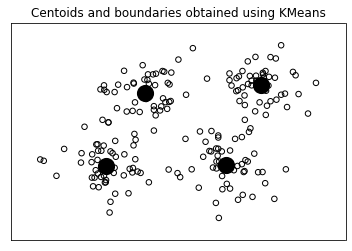

In [30]:
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(data)
plt.scatter(data[:,0], data[:,1], marker='o', facecolors='none', edgecolors='k', s=30)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], marker='o', s=200,
linewidths=3, color='k', zorder=10, facecolors='black')
x_min, x_max = min(data[:, 0]) - 1, max(data[:, 0]) + 1
y_min, y_max = min(data[:, 1]) - 1, max(data[:, 1]) + 1
plt.title('Centoids and boundaries obtained using KMeans')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [49]:
scores = []
range_values = np.arange(2, 10)
for i in range_values:
    kmeans = KMeans(init='k-means++', n_clusters=i, n_init=10)
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_,metric='euclidean', sample_size=len(data))
    print ("\n聚类个数 =", i)
    print ("\n轮廓系数得分 =", score)
    scores.append(score)


聚类个数 = 2

轮廓系数得分 = 0.4405151596377951

聚类个数 = 3

轮廓系数得分 = 0.4831677263389899

聚类个数 = 4

轮廓系数得分 = 0.5773232071896658

聚类个数 = 5

轮廓系数得分 = 0.5197985623269674

聚类个数 = 6

轮廓系数得分 = 0.4485117749807425

聚类个数 = 7

轮廓系数得分 = 0.41579452142950646

聚类个数 = 8

轮廓系数得分 = 0.3419156047021329

聚类个数 = 9

轮廓系数得分 = 0.3398591014025137


Text(0.5, 1.0, 'Silhouette score')

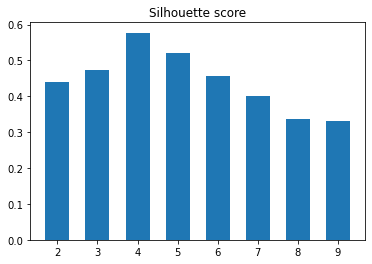

In [42]:
plt.figure()
plt.bar(range_values, scores, width=0.6, align='center')
plt.title('Silhouette score')

In [36]:
X = data
ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print("质心：\n", cluster_centers)
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("不同的聚类数量 : %d \n" %n_clusters_)

质心：
 [[5.50028846 4.65711538]
 [2.83558824 3.41833333]]
不同的聚类数量 : 2 



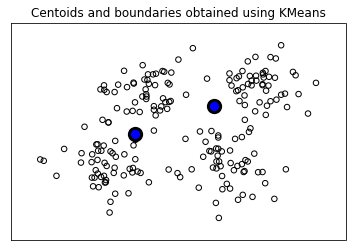

In [37]:
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', edgecolors='k', s=30)
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='o', s=150, linewidths=3, color='k', zorder=10, facecolors='blue')
x_min, x_max = min(X[:, 0]) - 1, max(X[:, 0]) + 1
y_min, y_max = min(X[:, 1]) - 1, max(X[:, 1]) + 1
plt.title('Centoids and boundaries obtained using KMeans')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [47]:
X = data
bandwidth = estimate_bandwidth(X, quantile = 0.2)
ms = MeanShift(bandwidth = bandwidth).fit(X)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print("质心：\n", cluster_centers)
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("不同的聚类数量 : %d \n" %n_clusters_)

质心：
 [[3.07897959 5.15326531]
 [6.9823913  5.59804348]
 [5.868      2.21622222]
 [1.97733333 2.00644444]]
不同的聚类数量 : 4 



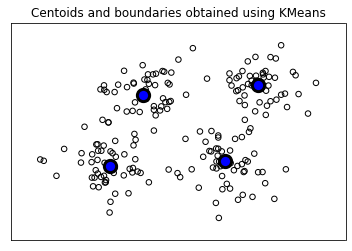

In [48]:
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', edgecolors='k', s=30)
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='o', s=150, linewidths=3, color='k', zorder=10, facecolors='blue')
x_min, x_max = min(X[:, 0]) - 1, max(X[:, 0]) + 1
y_min, y_max = min(X[:, 1]) - 1, max(X[:, 1]) + 1
plt.title('Centoids and boundaries obtained using KMeans')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [57]:
scores = []
range_values = np.arange(1, 10)
for i in range_values:
    ms = MeanShift(bandwidth = i).fit(X)
    ms.fit(X)
    score = silhouette_score(data, ms.labels_, metric='euclidean')
    print ("\n分位数 =", i)
    print ("\n轮廓系数得分 =", score)
    scores.append(score)


分位数 = 1

轮廓系数得分 = 0.35763520863833564

分位数 = 2

轮廓系数得分 = 0.5773232071896658


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

质心：
 [[3.1032     5.185     ]
 [1.9162     2.15      ]
 [7.03346939 5.59714286]
 [5.8555102  2.17469388]]
不同的聚类数量 : 4 



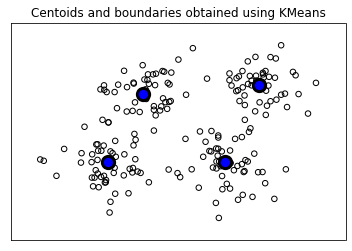

In [60]:
X = data
ms = MeanShift(bandwidth = 2).fit(X)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print("质心：\n", cluster_centers)
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("不同的聚类数量 : %d \n" %n_clusters_)
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', edgecolors='k', s=30)
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='o', s=150, linewidths=3, color='k', zorder=10, facecolors='blue')
x_min, x_max = min(X[:, 0]) - 1, max(X[:, 0]) + 1
y_min, y_max = min(X[:, 1]) - 1, max(X[:, 1]) + 1
plt.title('Centoids and boundaries obtained using KMeans')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
X = data.iloc[:,[3,4]].values

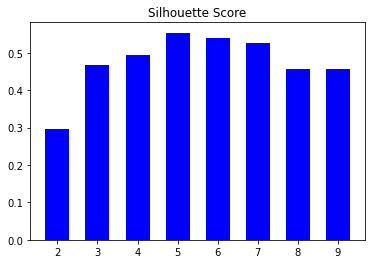

In [7]:
scores = []
range_values = np.arange(2,10)
for i in range_values:
    kmeans = KMeans(init = 'k-means++', n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_, metric = 'euclidean', sample_size = len(X))
    scores.append(score)
plt.figure()
plt.bar(range_values, scores, width = 0.6, color = 'b', align = 'center')
plt.title('Silhouette Score')
plt.show()

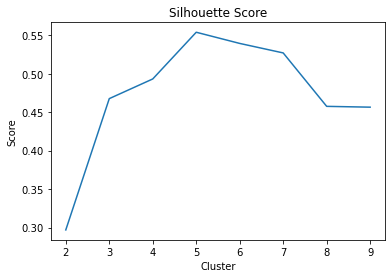

In [8]:
plt.plot(range_values, scores)
plt.title('Silhouette Score')
plt.xlabel('Cluster')
plt.ylabel('Score')
plt.show()

In [9]:
km = KMeans(init = 'k-means++', n_clusters = 5, max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(X)

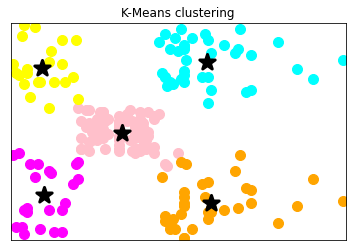

In [13]:
plt.scatter(X[:,0],X[:,1], marker='o', facecolors='b', edgecolor = 'k', s = 30)
centroids = km.cluster_centers_
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 100, c = 'pink', label = 'mister')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(centroids[:,0], centroids[:,1], marker = '*', s = 260, linewidths = 3, color = 'black', label = 'centroid')
x_min, x_max = min(X[:, 0])-1, max(X[:,0])+1
y_min, y_max = min(X[:, 1])-1, max(X[:,1])+1
plt.title('K-Means clustering')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

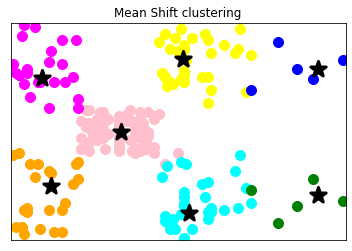

In [17]:
bandwidth = estimate_bandwidth(X, quantile = 0.1)
ms = MeanShift(bandwidth = bandwidth).fit(X)
y_means = ms.fit_predict(X)
plt.scatter(X[:,0],X[:,1], marker='o', facecolors='b', edgecolor = 'k', s = 30)
centroids = ms.cluster_centers_
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 100, c = 'pink')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 100, c = 'yellow')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 100, c = 'cyan')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 100, c = 'magenta')
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s = 100, c = 'orange')
plt.scatter(X[y_means == 5, 0], X[y_means == 5, 1], s = 100, c = 'blue')
plt.scatter(X[y_means == 6, 0], X[y_means == 6, 1], s = 100, c = 'green')
plt.scatter(centroids[:,0], centroids[:,1], marker = '*', s = 260, linewidths = 3, color = 'black', label = 'centroid')
x_min, x_max = min(X[:, 0])-1, max(X[:,0])+1
y_min, y_max = min(X[:, 1])-1, max(X[:,1])+1
plt.title('Mean Shift clustering')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()